### Problem Statement:

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


In [49]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Loading the Dataset

In [50]:
df = pd.read_csv("Country-data (1).csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [51]:
df.shape

(167, 10)

# Data Dictionary
**Column Name: Description**
* country: Name of the country

* child_mort: Death of children under 5 years of age per 1000 live births

* exports: Exports of goods and services per capita. Given as %age of the 
GDP per capita

* health: Total health spending per capita. Given as %age of GDP per capita

* imports: Imports of goods and services per capita. Given as %age of the
GDP per capita

* Income: Net income per person

* Inflation: The measurement of the annual growth rate of the Total GDP

* life_expec: The average number of years a new born child would live 
if the current mortality patterns are to remain the same

* total_fer: The number of children that would be born to each woman 
if the current age-fertility rates remain the same.

* gdpp: The GDP per capita. Calculated as the Total GDP divided 
by the total population.

In [52]:
# Since country is an unique identifier of the row, we can set it as index
df.set_index('country', inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [53]:
# Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [54]:
# Five point summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


**Inference:**
* All the economic factors like imports, exports, inflation and gdp
are right skewed. Shows huge variations in economic conditions of countries.

* Health factors like child_mort, healt total fetility rate are also right skewed
which shows huge variations in health conditions of population in countries.

<Axes: >

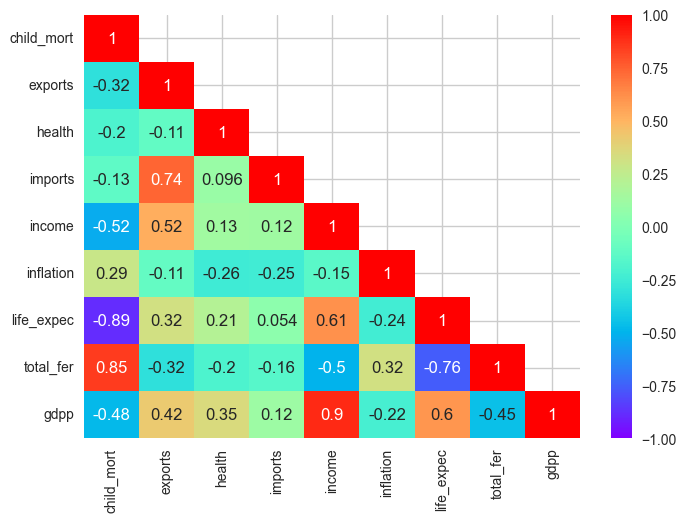

In [55]:
# Let's explore kind of relationship between the variables
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap='rainbow',
            mask=np.triu(df.corr(),k=1))

**Inference:**
* Higher gpd leads to higher net income per person.

* Countries with high fertility have higher child mortality rate this would mean poor health structure in country.

* Child mortality is negaitvely correlated with life expectancy, income and gdpp.

* Countries with better life expectancy have less total fertility which indicates better healthcare.

* Countries with better income have better life expectancy.

* Countries who have better exports have better income hence spending on imports is better as well.

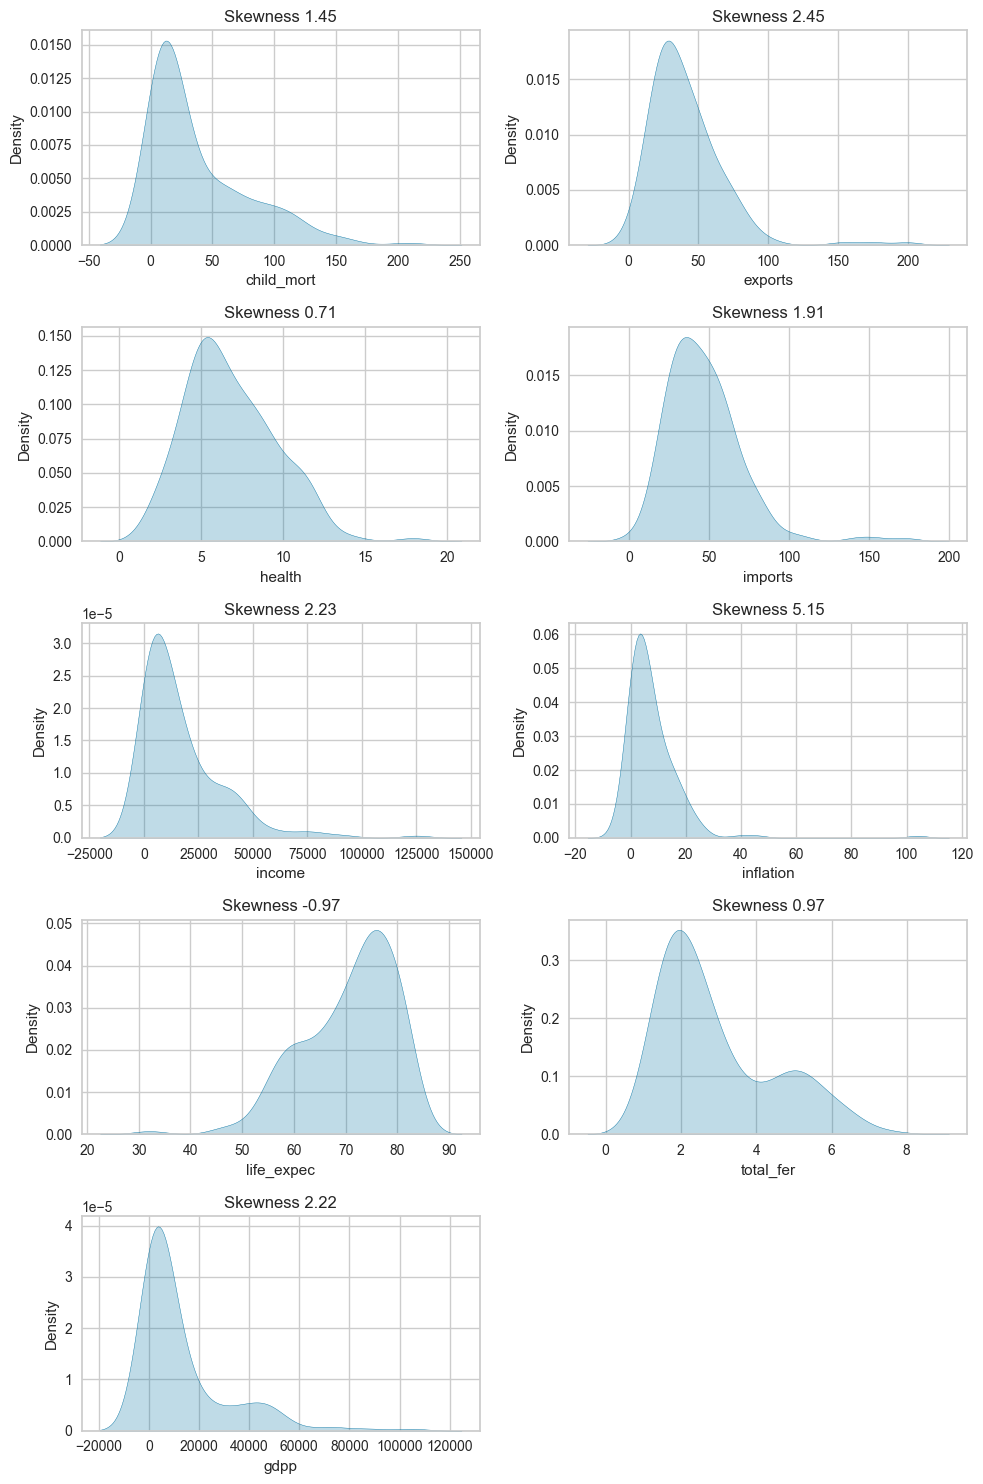

In [56]:
# Univariate Analysis
plt.figure(figsize=(10,15))
t=1
for i in df.columns:
    plt.subplot(5,2,t)
    sns.kdeplot(df[i],fill=True)
    plt.title(f'Skewness {round(df[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

**Inference:**
*  Most of the columns highly right skewed.

* Health is moderately right skewed. While life expectancy is left skewed.

*  

*

*

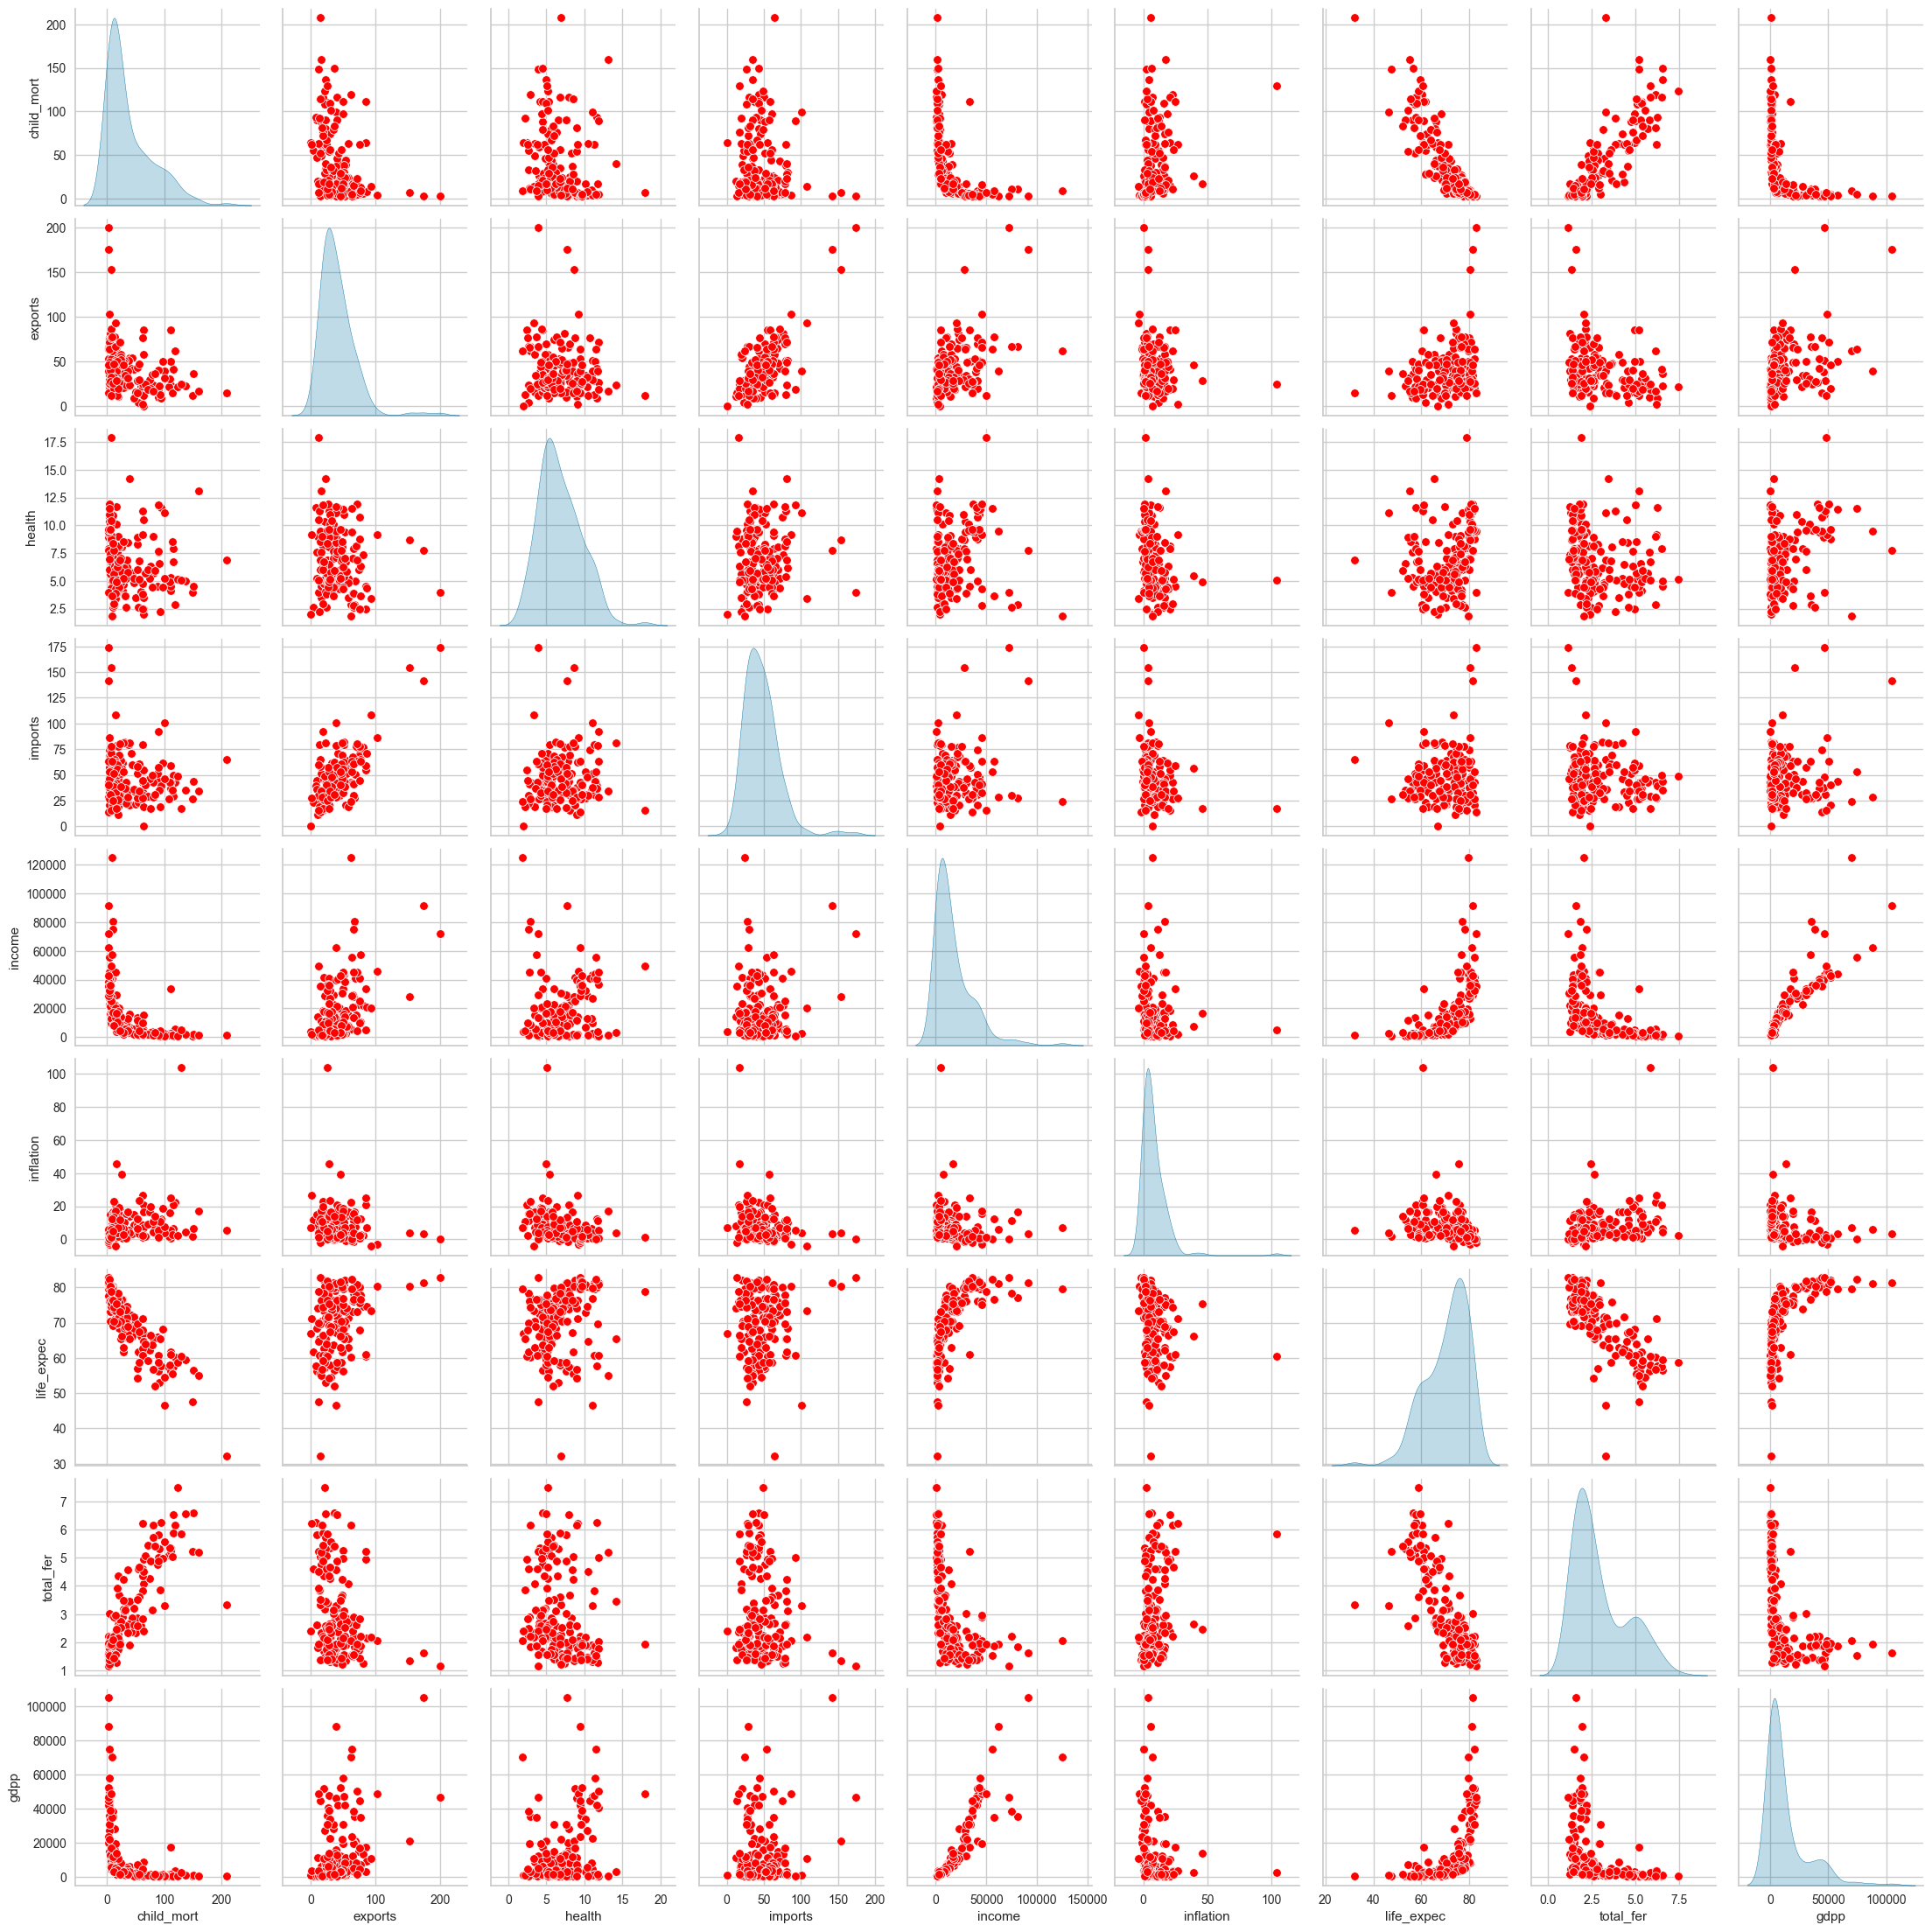

In [57]:
# Multivariate Analysis
sns.pairplot(df,diag_kind='kde', plot_kws={'color':'red'})
plt.show()

### Data Preprocessing

In [58]:
# Chekc for null values
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

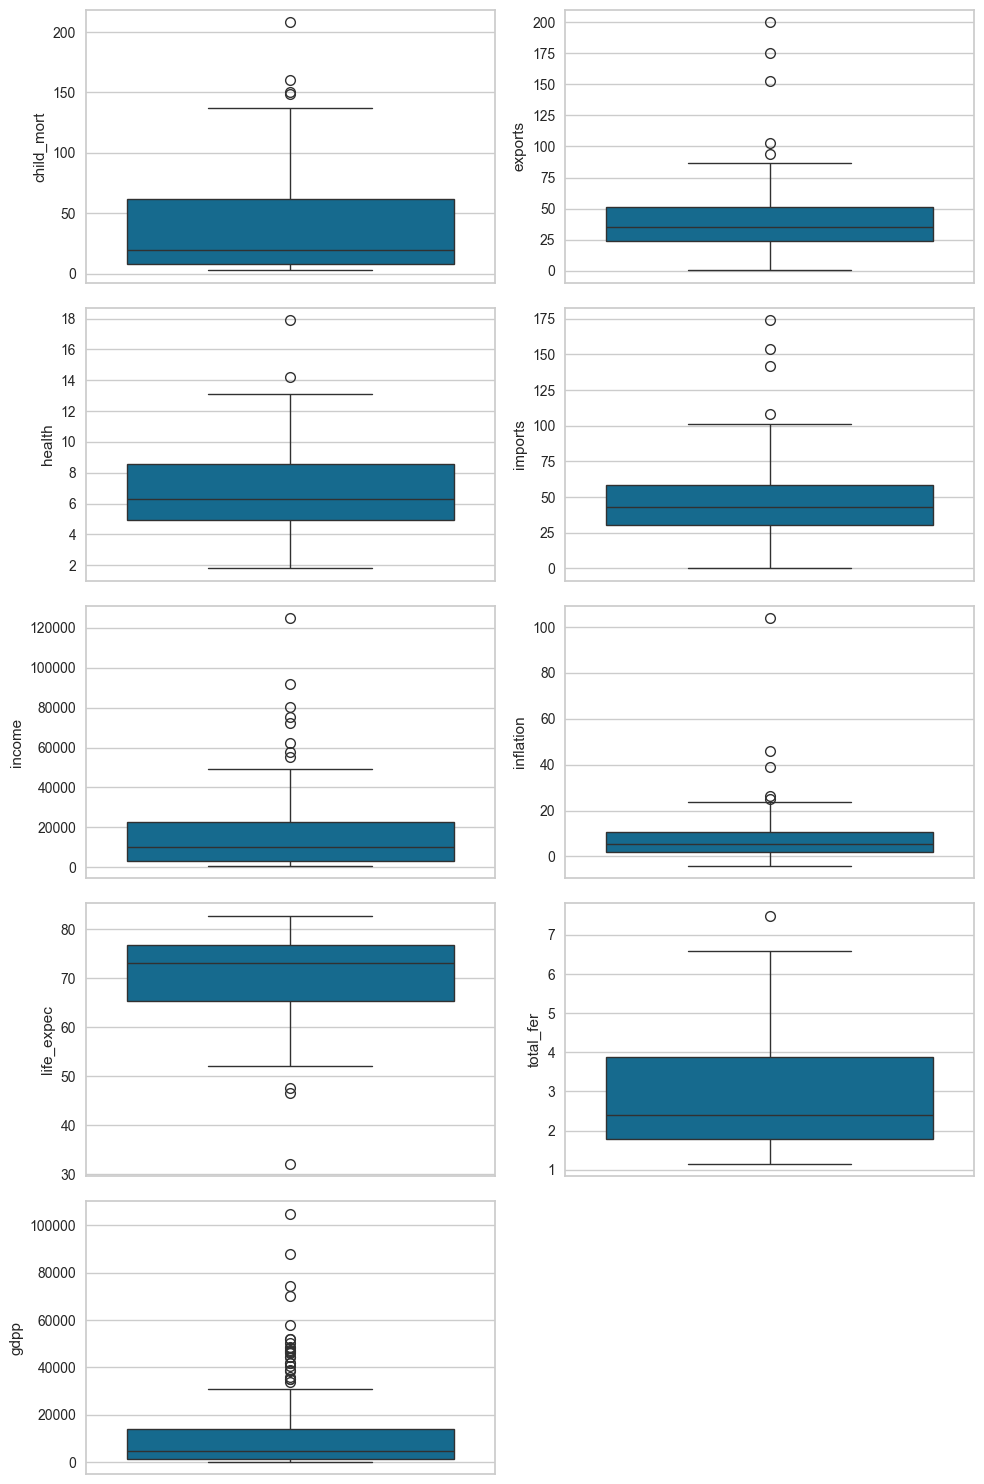

In [59]:
# Let's check the outliers
plt.figure(figsize=(10,15)) 
t=1
for i in df.columns:
    plt.subplot(5,2,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

In [60]:
# Let's go with Capping the extreme outliers. By taking whisker value as 2.5
for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3  = df[i].quantile(0.75)
    iqr = q3-q1
    ul,ll = q3+2.5*iqr, q1-2.5*iqr
    df[i] = df[i].apply(lambda x: ul if x>ul else ll if x<ll 
                        else x)

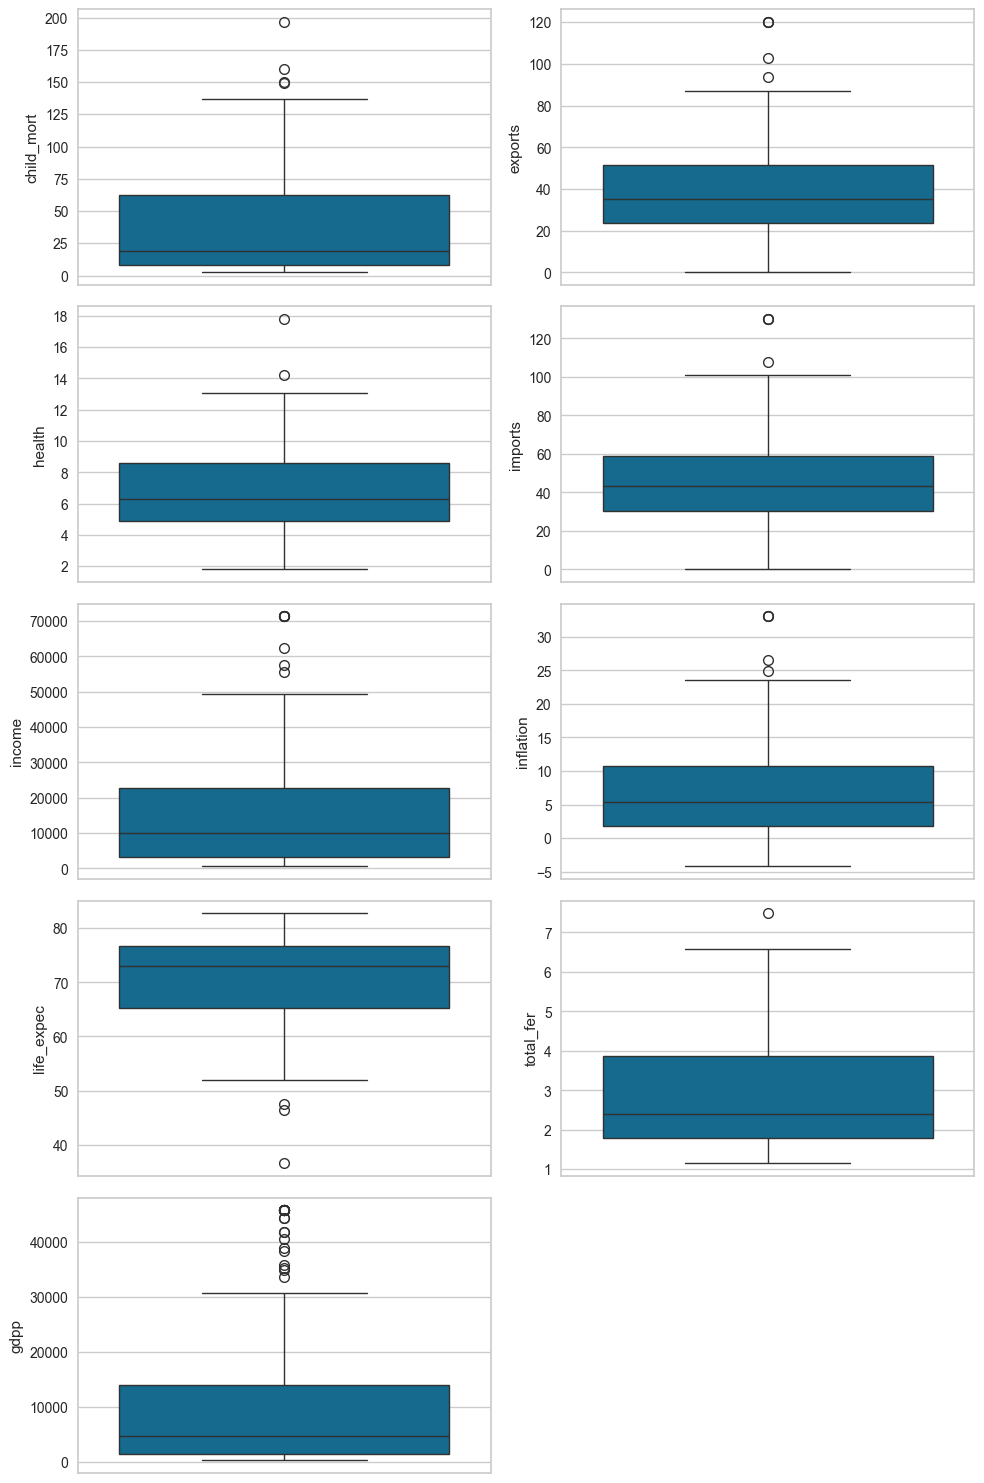

In [61]:
# Checking the outliers after capping
plt.figure(figsize=(10,15))
t=1
for i in df.columns:
    plt.subplot(5,2,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

In [62]:
# Scaling(Standardize the data)
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns,
                         index=df.index)


In [63]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.302168,-1.314143,0.279553,-0.068565,-0.878427,0.303790,-1.642400,1.902882,-0.767399
Albania,-0.540991,-0.528460,-0.096883,0.099062,-0.391534,-0.381016,0.652932,-0.859973,-0.526335
Algeria,-0.273031,-0.074510,-0.966706,-0.680176,-0.217727,1.225166,0.675771,-0.038404,-0.501118
Angola,2.023403,0.968702,-1.449130,-0.159174,-0.627373,2.096738,-1.197037,2.128151,-0.564502
Antigua and Barbuda,-0.698761,0.235398,-0.286928,0.565699,0.145102,-0.802968,0.710030,-0.541946,0.026399


### PCA

In [64]:
# import the PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=9)

pca.fit(df_scaled)

PCA(n_components=9)

In [65]:
# Let's check eigen values
pca.explained_variance_

array([4.30850704, 1.51337327, 1.22641085, 0.92104999, 0.60026658,
       0.21134307, 0.143956  , 0.0850118 , 0.04429827])

In [66]:
pca.explained_variance_ratio_.cumsum()

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697,
       0.96981892, 0.98571825, 0.99510744, 1.        ])

* We will go with top 5 PC's explaining approx~95% variance in the data

In [67]:
pca_final = PCA(n_components=5)
pca_data = pca_final.fit_transform(df_scaled)

In [68]:
pca_data = pd.DataFrame(pca_data, columns= ['PC1','PC2','PC3','PC4','PC5'],
                        index=df.index)

In [69]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311


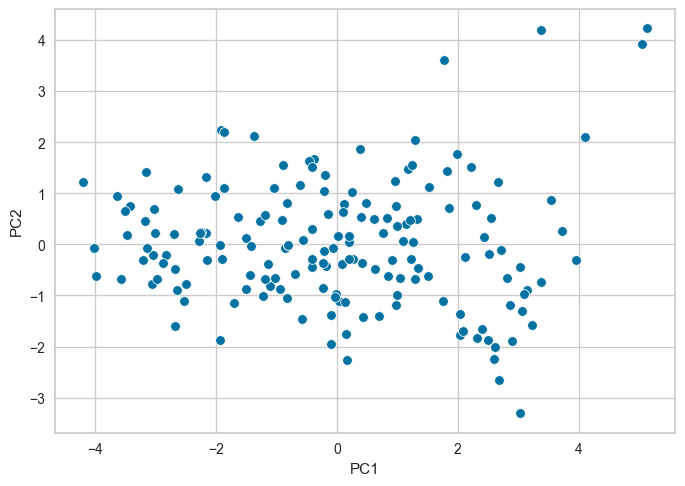

In [70]:
# Let's Visualize
sns.scatterplot(data= pca_data,x='PC1',y= 'PC2')
plt.show()

### Clustering

In [71]:
# import Kmeans, Agglomerative

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
# For KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# For Agglomerative
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from sklearn.metrics.pairwise import euclidean_distances

### K-Means Clustering

In [72]:
# Decide the value of k
kelbow = KElbowVisualizer(n_init=10,estimator=KMeans(random_state=0),k=12)

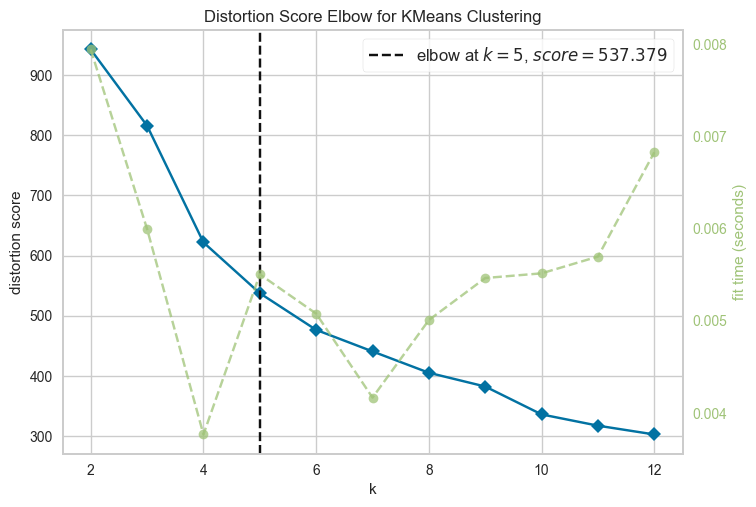

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
kelbow.fit(pca_data)
kelbow.show()

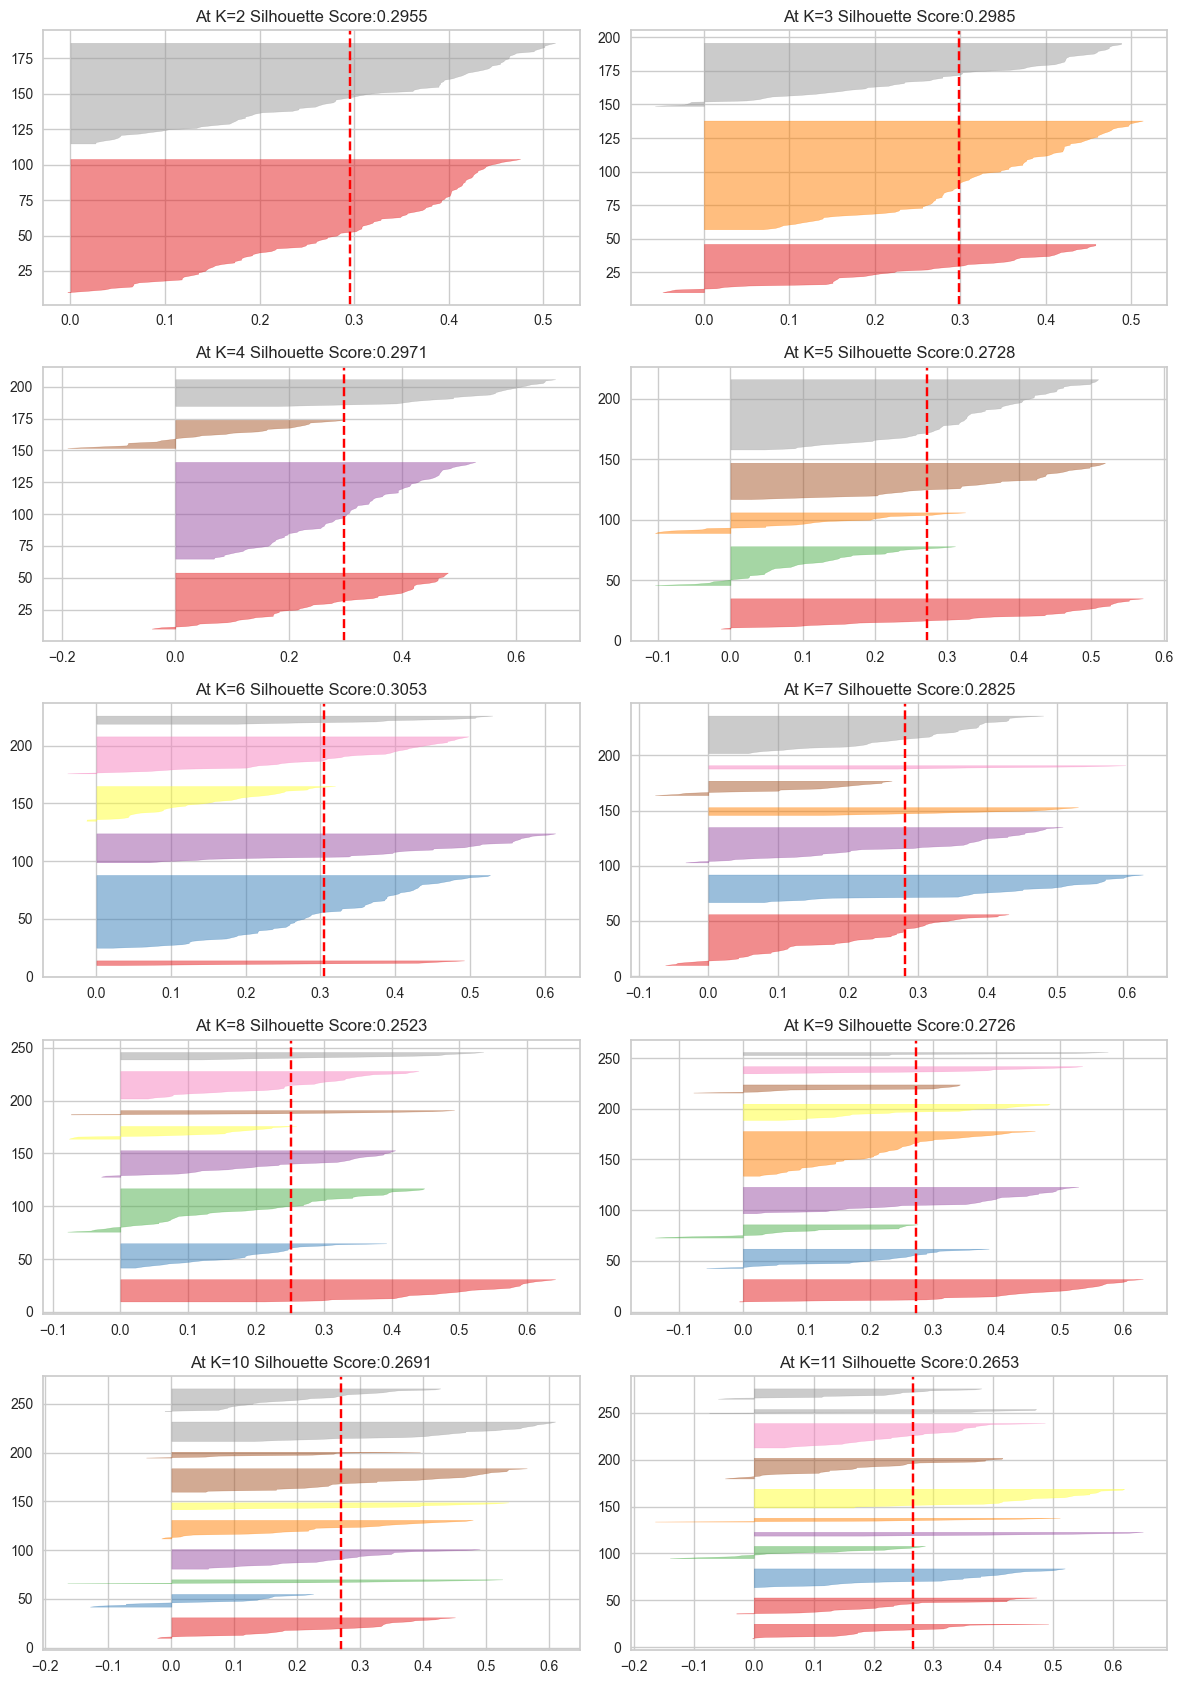

In [74]:
# It is difficult to locate the elbow in the above plot. Hence we will look
# At silhoutte visualizer to decide the value of k


plt.figure(figsize=(12,17))
t = 1
for i in range(2,12):
    plt.subplot(5,2,t)
    model = KMeans(n_init=10,n_clusters=i,random_state=0)
    sil_vis = SilhouetteVisualizer(model)
    sil_vis.fit(pca_data)
    plt.title(f'At K={i} Silhouette Score:{round(sil_vis.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()


**Inference**
* We have good slhouette score at k=3, and clusters are have good size too

* Hence we will go with K=3

### Business Intepretation

In [75]:
kmean_final = KMeans(n_init=10,n_clusters=3,random_state=0)
kmean_pred = kmean_final.fit_predict(pca_data)


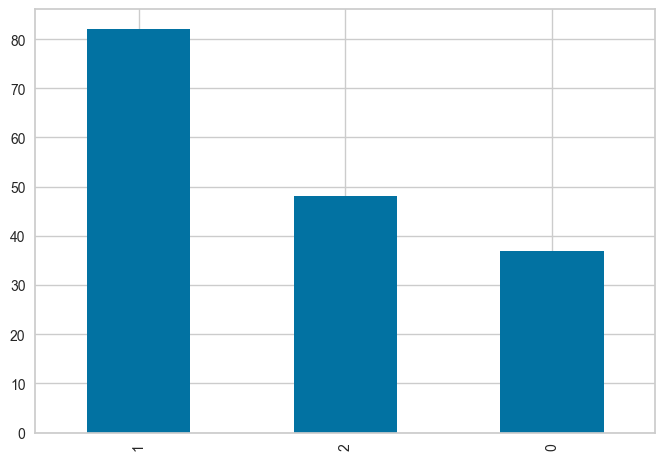

In [76]:
pd.Series(kmean_pred).value_counts().plot(kind='bar')
plt.show()

In [77]:
df['Labels'] = kmean_pred

In [78]:
df.groupby(by='Labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Labels,,,,,,,,,
0,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
1,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667


In [79]:
lab_map = {0:'Developed',1:'Developing',2:'Underdeveloped'}

In [80]:
df['Labels'] = df['Labels'].map(lab_map)

In [81]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing


In [82]:
# Countries that require funds
df[df['Labels'] == 'Underdeveloped'].index.to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [83]:
# Countries that don't require funds
df[df['Labels'] == 'Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [84]:
df[df['Labels'] == 'Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

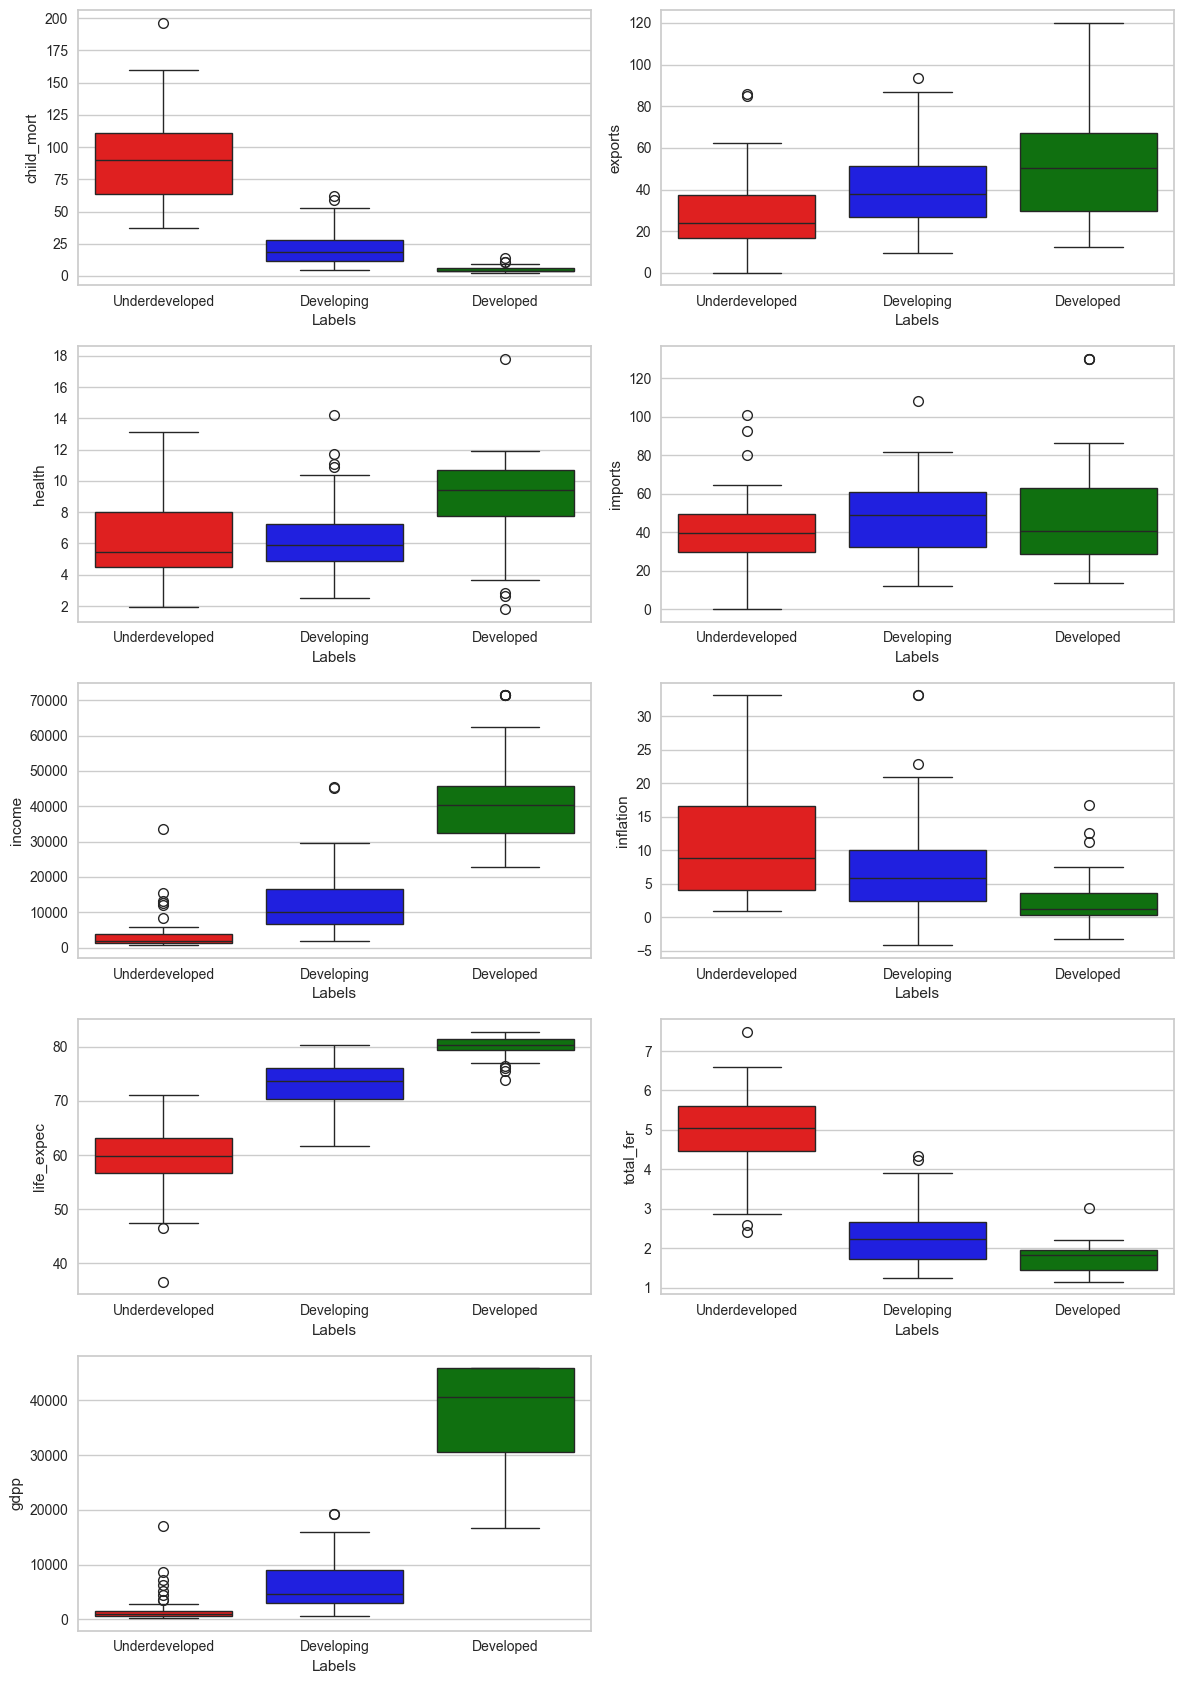

In [85]:
# let's explore these categories

t=1
plt.figure(figsize=(12,17))
for i in df.columns:
    if i !='Labels':
        plt.subplot(5,2,t)
        sns.boxplot(data=df,x='Labels',y=i,palette=['red','blue','green'])
        t+=1
plt.tight_layout()
plt.show()

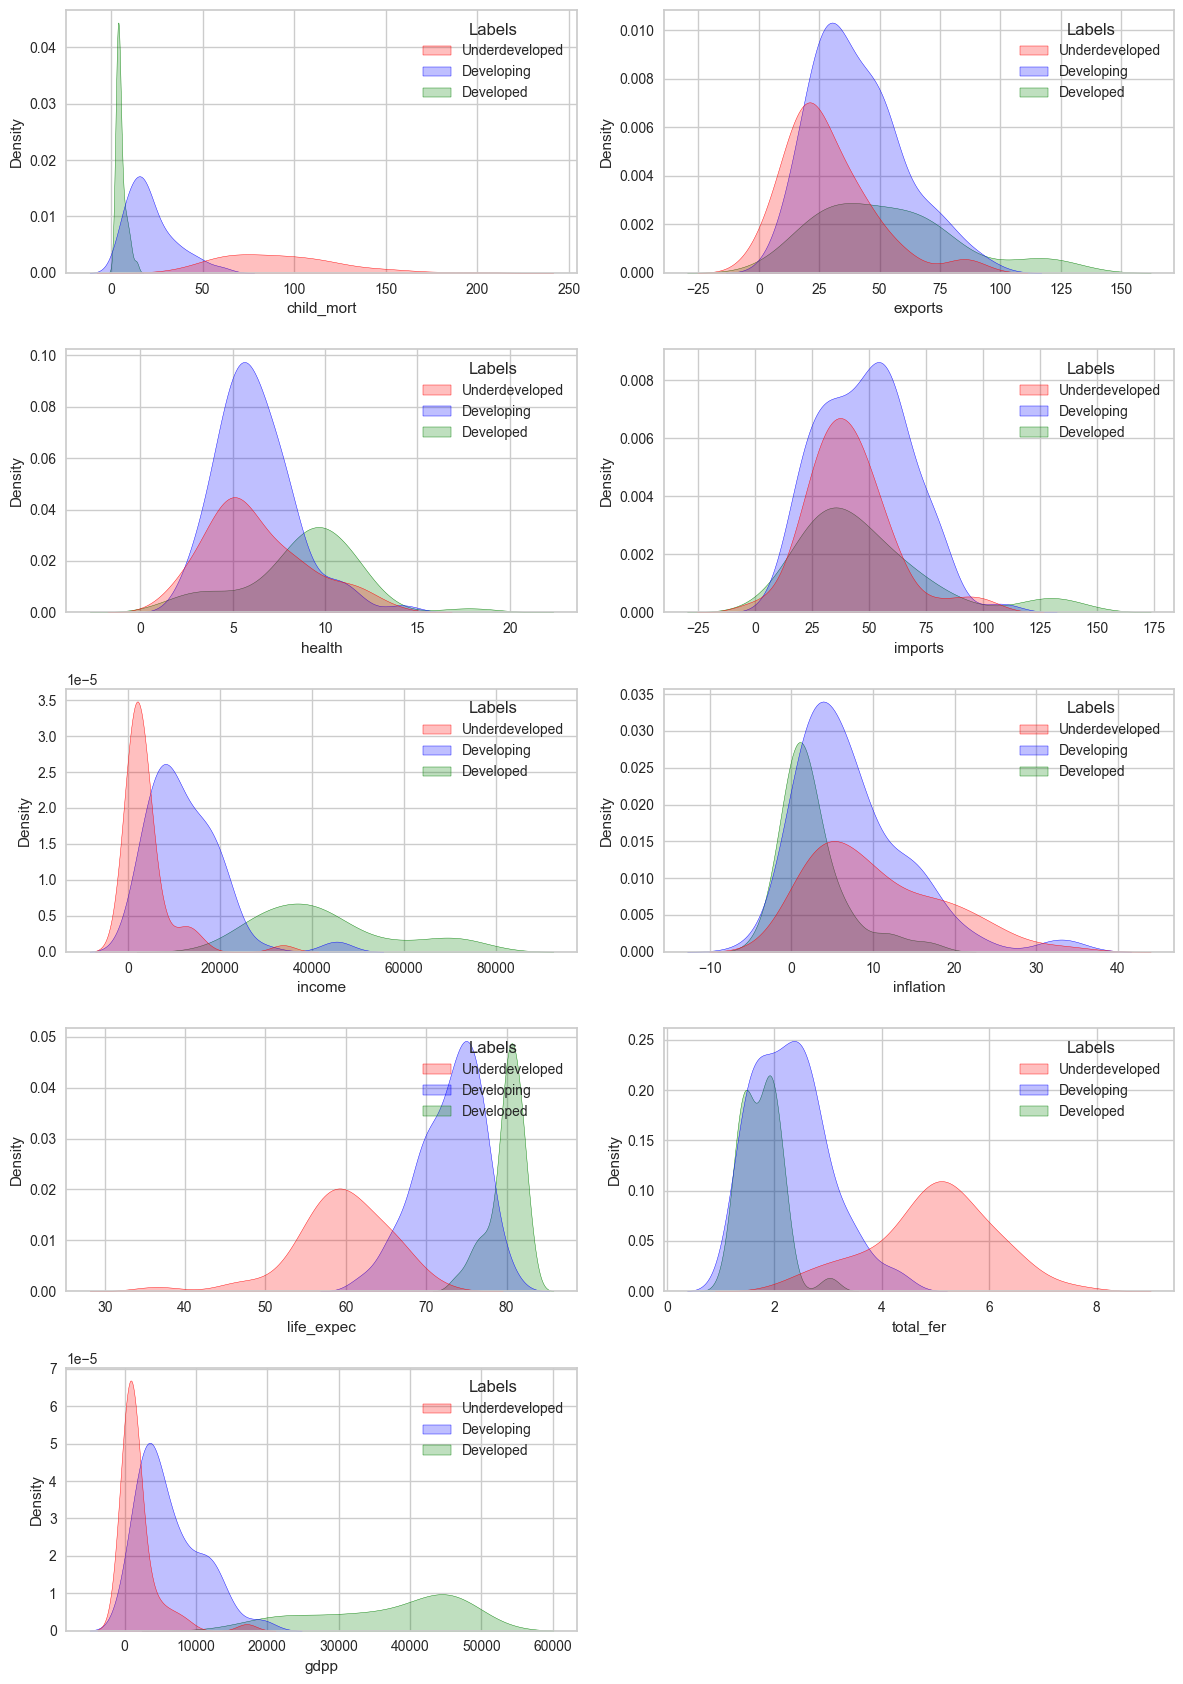

In [86]:
# Distribution of countries

t=1
plt.figure(figsize=(12,17))
for i in df.columns:
    if i !='Labels':
        plt.subplot(5,2,t)
        sns.kdeplot(data=df,x=i,hue='Labels',palette=['red','blue','green'],
                    fill=True)
        t+=1
plt.tight_layout()
plt.show()

**Inference**
* Child Mortality, Inflation and Total fertility is significantly high in undedeveloped countries.

* GDP, Income and Life Expectancy is significantly low in undedeveloped countries. 

In [87]:
# let's plot these countries on world map see countries from which contienent
# require more funds

In [88]:
import plotly.express as px

In [89]:
px.choropleth(data_frame=df, locationmode='country names',
              locations=df.index,color='Labels',
              color_discrete_map={'Developed': 'Green','Developing': 'Blue','Underdeveloped': 'Red'})

**Inference**
* Most of the African, countries Require more funds.

* Almost all Asian and South American countries are developing countries and need funds but on small level.

* All of the European countries and North American Countries and Austrilia and New Zealand are developed countries and don't requires any funds.

# Deployment

In [90]:
# We can make predictions using K-Means Clusterng. It will assign a centroid to the new data point
# and will classify it

In [109]:
d = [90.2,10.2,7.58,44.9,1610.0,6.44,56.2,5.82,10300.0] # let consider this as new data we will predict which group it belongs(to be predicted)

In [110]:
d_scaled = scaler.transform([d])

In [111]:
d_pcs = pca_final.transform(d_scaled)

In [112]:
kmean_final.predict(d_pcs)[0]

2

In [114]:
import pickle

In [116]:
# let's save all the instances as pickle fiels

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [117]:
with open('pca.pkl','wb') as file:
    pickle.dump(pca_final,file)

In [118]:
with open('model.pkl','wb') as file:
    pickle.dump(kmean_final,file)